In [ ]:
!pip install ydata_profiling
!pip install XGboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 18.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=045c4e8cf2ab341bbaa9405c4f968310076ce4fd142d48a22f3abb28be577296
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordcloud-1.8.2.2:
      Successfully uninstalled wordcloud-1.8.2.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

#one-liner eda
from ydata_profiling import ProfileReport

#handling imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#encoders
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#imputation
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#models
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier #Baseline model?
from sklearn.linear_model import LogisticRegression #Merely for testing relationships in EDA
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
#Sophisticated Models via XGboost
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict

#metrics
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
global class_labels
class_labels = ['high', 'low', 'medium']
#Cleaned dataset to an extent.
URL = 'https://raw.githubusercontent.com/Vz-3/dataset_storage/master/modeling%20and%20simulation/Formatted-Firesight-Dataset.csv'
df = pd.read_csv(URL)

df.head()

DAY  HOUR           ALARM_LEVEL  TEMPERATURE  HUMIDITY  DISTRICT1  \
0    2    22  fireout upon arrival           28      0.70          1   
1    2    21  fireout upon arrival           28      0.70          1   
2    5    16             1st alarm           30      0.70          0   
3    5    16             1st alarm           30      0.70          1   
4    7    11  fireout upon arrival           31      0.59          0   

   ENTITIES_nonresidential  ENTITIES_nonstructural  ENTITIES_residential  \
0                        0                       1                     0   
1                        0                       0                     1   
2                        0                       0                     1   
3                        0                       0                     1   
4                        0                       1                     0   

   ENTITIES_structural  ENTITIES_transport  FIRE_ORIGIN_battery short circuit  \
0                    0                   0                                  0   
1                    0                   0                                  0   
2                    0                   0                                  0   
3                    0                   0                                  0   
4                    0                   0                                  0   

   FIRE_ORIGIN_electrical ignition  FIRE_ORIGIN_ignition of materials  \
0                                1                                  0   
1                                1                                  0   
2                                0                                  0   
3                                0                                  0   
4                                1                                  0   

   FIRE_ORIGIN_lighted cigarette  FIRE_ORIGIN_open flame  FIRE_ORIGIN_others  \
0                              0                       0                   0   
1                              0                       0                   0   
2                              0                       1                   0   
3                              0                       0                   1   
4                              0                       0                   0   

   FIRE_ORIGIN_overheated engine  ESTIMATED_PHP_LOSS  
0                              0                1000  
1                              0                1000  
2                              0                5000  
3                              0               25000  
4                              0                 500

In [ ]:
def convertMissing(_df):
    _df['ALARM_LEVEL'] = _df['ALARM_LEVEL'].apply(lambda val: np.NaN if val == 3 else val)
    return _df

def getIIvalues(_df):
    _df = convertMissing(_df)
    iImp = IterativeImputer()
    imputed_data1 = pd.DataFrame(iImp.fit_transform(_df), columns=_df.columns)
    return imputed_data1

def getKNNIvalues(_df, n=11):
    _df = convertMissing(_df)
    knnImp = KNNImputer(n_neighbors = n)
    imputed_data2 = pd.DataFrame(knnImp.fit_transform(_df), columns=_df.columns)
    return imputed_data2

In [ ]:
def get_deets(_df):
    print("Shape:\n",_df.shape)
    print("Null:\n",_df.isnull().sum())
    print("Duplicates:\n",_df.duplicated())
    print("Statistics:\n",_df.describe())

#get_deets(df)

# Imputing before balancing the dataset.

In [ ]:
idf = df.copy()

In [ ]:
idf.dtypes
enc = LabelEncoder()
idf['ALARM_LEVEL'] = enc.fit_transform(idf['ALARM_LEVEL'])

print(idf['ALARM_LEVEL'].value_counts())

# ii_idf = getIIvalues(idf)
# ii_idf['ALARM_LEVEL'] = ii_idf['ALARM_LEVEL'].astype(int)
# ii_idf['ALARM_LEVEL'] = enc.inverse_transform(ii_idf['ALARM_LEVEL'])
# print(ii_idf['ALARM_LEVEL'].value_counts())

knn_idf = getKNNIvalues(idf)
knn_idf['ALARM_LEVEL'] = knn_idf['ALARM_LEVEL'].astype(int)
knn_idf['ALARM_LEVEL'] = enc.inverse_transform(knn_idf['ALARM_LEVEL'])
print(knn_idf['ALARM_LEVEL'].value_counts())

3    213
2     34
0     24
4      7
1      6
Name: ALARM_LEVEL, dtype: int64
fireout upon arrival    211
1st alarm                38
2nd alarm                28
no alarm                  7
Name: ALARM_LEVEL, dtype: int64


In [ ]:
df['ESTIMATED_PHP_LOSS'] = df['ESTIMATED_PHP_LOSS'].apply(lambda val: 'low' if val < 100000 else ('medium' if val < 1000000 else 'high'))
df[['ALARM_LEVEL','ESTIMATED_PHP_LOSS']] = df[['ALARM_LEVEL','ESTIMATED_PHP_LOSS']].astype('category')
df.dtypes

DAY                                     int64
HOUR                                    int64
ALARM_LEVEL                          category
TEMPERATURE                             int64
HUMIDITY                              float64
DISTRICT1                               int64
ENTITIES_nonresidential                 int64
ENTITIES_nonstructural                  int64
ENTITIES_residential                    int64
ENTITIES_structural                     int64
ENTITIES_transport                      int64
FIRE_ORIGIN_battery short circuit       int64
FIRE_ORIGIN_electrical ignition         int64
FIRE_ORIGIN_ignition of materials       int64
FIRE_ORIGIN_lighted cigarette           int64
FIRE_ORIGIN_open flame                  int64
FIRE_ORIGIN_others                      int64
FIRE_ORIGIN_overheated engine           int64
ESTIMATED_PHP_LOSS                   category
dtype: object

In [ ]:
df['ALARM_LEVEL'].value_counts()

missing                 213
fireout upon arrival     34
1st alarm                24
no alarm                  7
2nd alarm                 6
Name: ALARM_LEVEL, dtype: int64

In [ ]:
df['ESTIMATED_PHP_LOSS'].value_counts()

low       263
medium     11
high       10
Name: ESTIMATED_PHP_LOSS, dtype: int64

# Baseline w/o imputation

In [ ]:
adjustX = df.drop('ESTIMATED_PHP_LOSS',axis=1)
adjusty = df['ESTIMATED_PHP_LOSS']

resample_pipeline = Pipeline([
    ('oversample', SMOTE()),  # Increase the number of samples in the minority class to 50% of the majority class
    ('undersample', RandomUnderSampler()),  # Reduce the number of samples in the majority class to 80% of the minority class
])

#Performing brief label encoding to adjust to pipeline requirements then quickly turn it back.
encoderL = LabelEncoder()
adjustX['ALARM_LEVEL'] = encoderL.fit_transform(adjustX['ALARM_LEVEL'])

X_resampled, y_resampled = resample_pipeline.fit_resample(adjustX, adjusty)

In [ ]:
y_resampled.value_counts() #the undersampling and oversampling methods were sent to auto, at least now it's balanced.

high      263
low       263
medium    263
Name: ESTIMATED_PHP_LOSS, dtype: int64

CL Report:                precision    recall  f1-score   support

        high       0.76      0.89      0.82        75
         low       1.00      0.58      0.73        83
      medium       0.74      0.95      0.83        79

    accuracy                           0.80       237
   macro avg       0.83      0.81      0.80       237
weighted avg       0.84      0.80      0.79       237



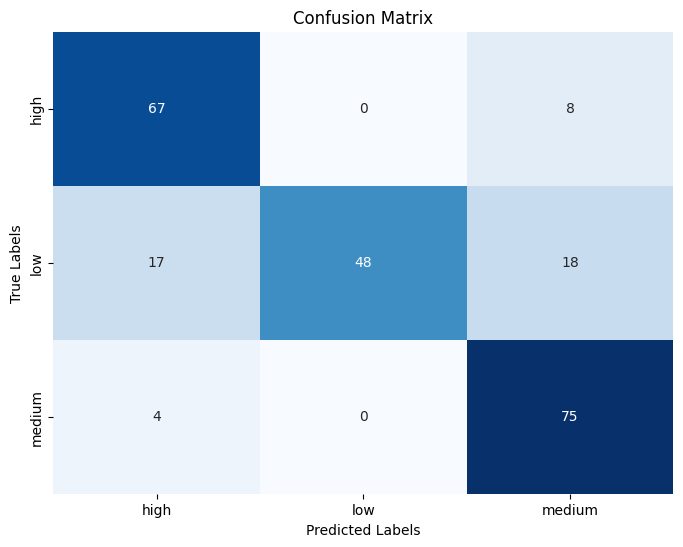

In [ ]:
#Baseline model without imputing values (though label encoding)
X = X_resampled
y = y_resampled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

knnPred = knn.predict(X_test)

print("CL Report: ",classification_report(y_test, knnPred, zero_division=1))
confusionMatrix = confusion_matrix(y_test, knnPred, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Imputing after balancing the dataset (not good)

In [ ]:
# testX = getIIvalues(X_resampled)
# testX['ALARM_LEVEL'] = testX['ALARM_LEVEL'].astype(int)
# testX['ALARM_LEVEL'] = encoderL.inverse_transform(testX['ALARM_LEVEL'])
# testX['ALARM_LEVEL'].value_counts()

In [ ]:
# testX2 = getKNNIvalues(X_resampled, n=10)
# testX2['ALARM_LEVEL'] = testX2['ALARM_LEVEL'].astype(int)
# testX2['ALARM_LEVEL'] = encoderL.inverse_transform(testX2['ALARM_LEVEL'])
# testX2['ALARM_LEVEL'].value_counts()

# MODELING AND EVALUATION

In [ ]:
#After trials and tribulations, we repeat the balancing data with the aptly imputed values from knn
adjustX = knn_idf.drop('ESTIMATED_PHP_LOSS',axis=1)
adjusty = knn_idf['ESTIMATED_PHP_LOSS'].apply(lambda val: 'low' if val < 100000 else ('medium' if val < 1000000 else 'high'))

print(adjusty.dtype)

resample_pipeline = Pipeline([
    ('oversample', SMOTE()),  # Increase the number of samples in the minority class to 50% of the majority class
    ('undersample', RandomUnderSampler()),  # Reduce the number of samples in the majority class to 80% of the minority class
])

#Performing brief label encoding to adjust to pipeline requirements then quickly turn it back.
encoderL = LabelEncoder()
adjustX['ALARM_LEVEL'] = encoderL.fit_transform(adjustX['ALARM_LEVEL'])

X_resampled, y_resampled = resample_pipeline.fit_resample(adjustX, adjusty)
X_resampled.head()

object


DAY  HOUR  ALARM_LEVEL  TEMPERATURE  HUMIDITY  DISTRICT1  \
0   3.0  10.0            0         29.0      0.74        0.0   
1   3.0  12.0            0         31.0      0.70        1.0   
2  23.0  11.0            0         33.0      0.56        1.0   
3  13.0  23.0            0         26.0      0.89        0.0   
4  21.0  16.0            0         29.0      0.74        1.0   

   ENTITIES_nonresidential  ENTITIES_nonstructural  ENTITIES_residential  \
0                      0.0                     0.0                   1.0   
1                      0.0                     0.0                   1.0   
2                      1.0                     0.0                   0.0   
3                      1.0                     0.0                   0.0   
4                      1.0                     0.0                   0.0   

   ENTITIES_structural  ENTITIES_transport  FIRE_ORIGIN_battery short circuit  \
0                  0.0                 0.0                                0.0   
1                  0.0                 0.0                                0.0   
2                  0.0                 0.0                                0.0   
3                  0.0                 0.0                                0.0   
4                  0.0                 0.0                                0.0   

   FIRE_ORIGIN_electrical ignition  FIRE_ORIGIN_ignition of materials  \
0                              1.0                                0.0   
1                              0.0                                0.0   
2                              0.0                                0.0   
3                              1.0                                0.0   
4                              0.0                                0.0   

   FIRE_ORIGIN_lighted cigarette  FIRE_ORIGIN_open flame  FIRE_ORIGIN_others  \
0                            0.0                     0.0                 0.0   
1                            0.0                     0.0                 0.0   
2                            0.0                     1.0                 0.0   
3                            0.0                     0.0                 0.0   
4                            0.0                     0.0                 1.0   

   FIRE_ORIGIN_overheated engine  
0                            0.0  
1                            1.0  
2                            0.0  
3                            0.0  
4                            0.0

In [ ]:
#OHE for ALARM_LEVEL
ohe = OneHotEncoder()
X_resampled['ALARM_LEVEL'] = encoderL.inverse_transform(X_resampled['ALARM_LEVEL'])

encodedData = ohe.fit_transform(X_resampled[['ALARM_LEVEL']])
ohe_df = pd.DataFrame(encodedData.toarray(), columns=ohe.get_feature_names_out())
X_enc = pd.concat([X_resampled, ohe_df], axis=1)
X_enc.drop(['ALARM_LEVEL','DAY','HOUR','DISTRICT1'],axis=1,inplace=True)
X_enc.head()

TEMPERATURE  HUMIDITY  ENTITIES_nonresidential  ENTITIES_nonstructural  \
0         29.0      0.74                      0.0                     0.0   
1         31.0      0.70                      0.0                     0.0   
2         33.0      0.56                      1.0                     0.0   
3         26.0      0.89                      1.0                     0.0   
4         29.0      0.74                      1.0                     0.0   

   ENTITIES_residential  ENTITIES_structural  ENTITIES_transport  \
0                   1.0                  0.0                 0.0   
1                   1.0                  0.0                 0.0   
2                   0.0                  0.0                 0.0   
3                   0.0                  0.0                 0.0   
4                   0.0                  0.0                 0.0   

   FIRE_ORIGIN_battery short circuit  FIRE_ORIGIN_electrical ignition  \
0                                0.0                              1.0   
1                                0.0                              0.0   
2                                0.0                              0.0   
3                                0.0                              1.0   
4                                0.0                              0.0   

   FIRE_ORIGIN_ignition of materials  FIRE_ORIGIN_lighted cigarette  \
0                                0.0                            0.0   
1                                0.0                            0.0   
2                                0.0                            0.0   
3                                0.0                            0.0   
4                                0.0                            0.0   

   FIRE_ORIGIN_open flame  FIRE_ORIGIN_others  FIRE_ORIGIN_overheated engine  \
0                     0.0                 0.0                            0.0   
1                     0.0                 0.0                            1.0   
2                     1.0                 0.0                            0.0   
3                     0.0                 0.0                            0.0   
4                     0.0                 1.0                            0.0   

   ALARM_LEVEL_1st alarm  ALARM_LEVEL_2nd alarm  \
0                    1.0                    0.0   
1                    1.0                    0.0   
2                    1.0                    0.0   
3                    1.0                    0.0   
4                    1.0                    0.0   

   ALARM_LEVEL_fireout upon arrival  ALARM_LEVEL_no alarm  
0                               0.0                   0.0  
1                               0.0                   0.0  
2                               0.0                   0.0  
3                               0.0                   0.0  
4                               0.0                   0.0

KNeighbors Classifier Report:
              precision    recall  f1-score   support

        high       0.88      0.98      0.92        88
         low       1.00      0.82      0.90        85
      medium       0.89      0.94      0.92        88

    accuracy                           0.92       261
   macro avg       0.92      0.91      0.92       261
weighted avg       0.92      0.92      0.92       261



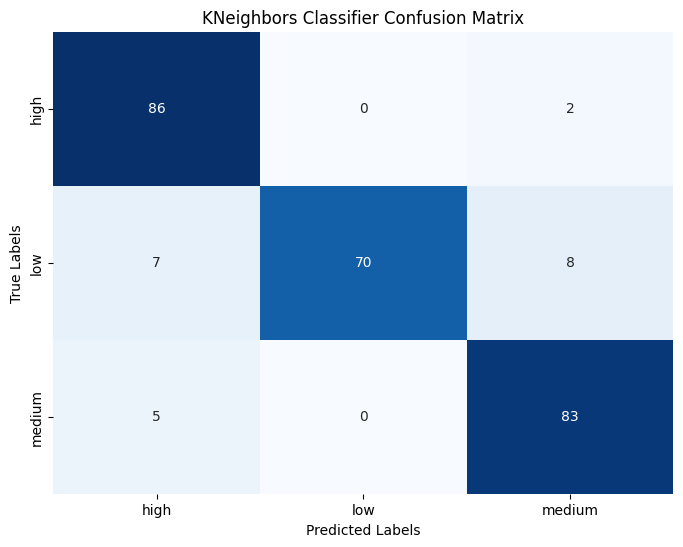

In [ ]:
#Baseline v2
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_resampled, test_size=0.33, random_state=42)

modelKnn = KNeighborsClassifier(n_neighbors=9)
modelKnn.fit(X_train, y_train)

knn_pred = modelKnn.predict(X_test)

print("KNeighbors Classifier Report:")
print(classification_report(y_test, knn_pred, zero_division=1))
confusionMatrix_rf = confusion_matrix(y_test, knn_pred, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('KNeighbors Classifier Confusion Matrix')
plt.show()

# Gradient Boosting, RandomForest, and SVC

RandomForest Classifier Report:
              precision    recall  f1-score   support

        high       0.97      0.97      0.97        88
         low       0.97      0.91      0.94        85
      medium       0.94      1.00      0.97        88

    accuracy                           0.96       261
   macro avg       0.96      0.96      0.96       261
weighted avg       0.96      0.96      0.96       261



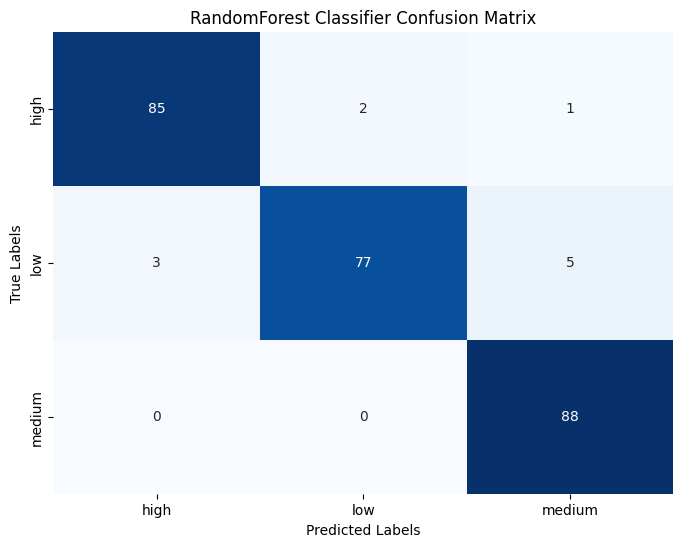

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_resampled, test_size=0.33, random_state=42)

modelRfc = RandomForestClassifier(n_estimators=100, random_state=42)
modelRfc.fit(X_train, y_train)

rfc_pred = modelRfc.predict(X_test)

print("RandomForest Classifier Report:")
print(classification_report(y_test, rfc_pred, zero_division=1))
confusionMatrix_rf = confusion_matrix(y_test, rfc_pred, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('RandomForest Classifier Confusion Matrix')
plt.show()

Support Vector Machine Classifier Report:
              precision    recall  f1-score   support

        high       0.95      0.86      0.90        88
         low       1.00      0.88      0.94        85
      medium       0.83      1.00      0.91        88

    accuracy                           0.92       261
   macro avg       0.93      0.92      0.92       261
weighted avg       0.93      0.92      0.92       261



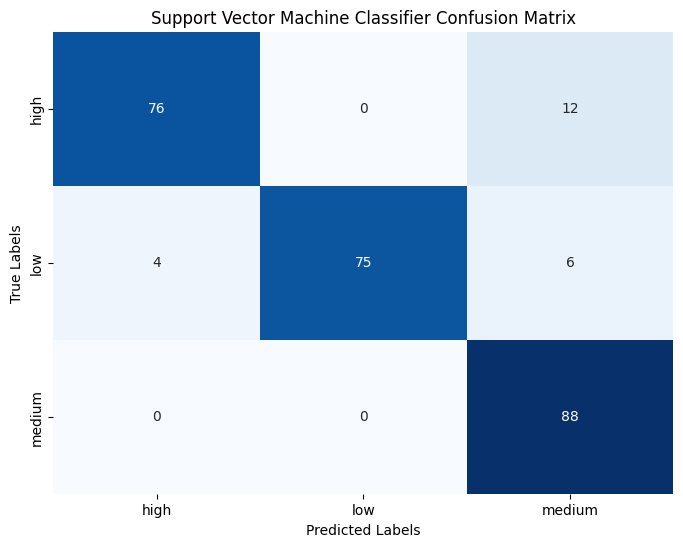

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_resampled, test_size=0.33, random_state=42)

modelSVM = SVC(kernel='linear', C=5.0, random_state=42)
modelSVM.fit(X_train, y_train)

svm_pred = modelSVM.predict(X_test)

print("Support Vector Machine Classifier Report:")
print(classification_report(y_test, svm_pred, zero_division=1))
confusionMatrix_rf = confusion_matrix(y_test, svm_pred, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Support Vector Machine Classifier Confusion Matrix')
plt.show()

Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

        high       0.98      0.98      0.98        88
         low       0.97      0.92      0.95        85
      medium       0.95      1.00      0.97        88

    accuracy                           0.97       261
   macro avg       0.97      0.96      0.97       261
weighted avg       0.97      0.97      0.97       261



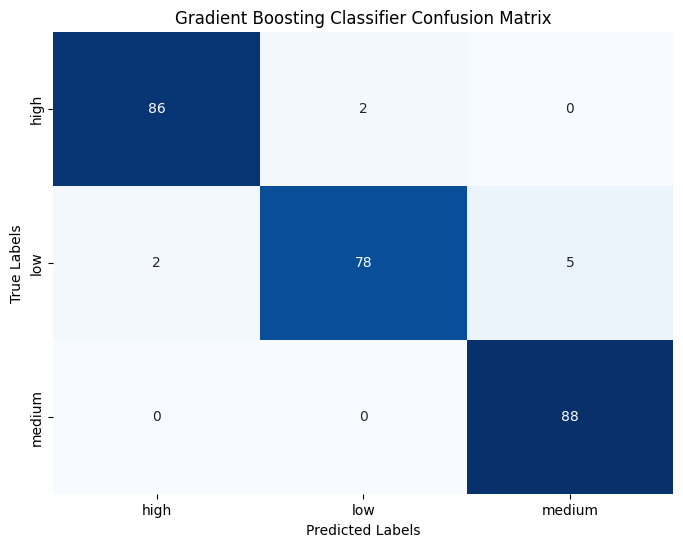

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_resampled, test_size=0.33, random_state=42)

modelGb = GradientBoostingClassifier(n_estimators=100, random_state=42)
modelGb.fit(X_train, y_train)

gb_pred = modelGb.predict(X_test)

print("Gradient Boosting Classifier Report:")
print(classification_report(y_test, gb_pred, zero_division=1))
confusionMatrix_rf = confusion_matrix(y_test, gb_pred, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gradient Boosting Classifier Confusion Matrix')
plt.show()

Using XGBoost

XGBoost Classifier with Cross-Validation Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       180
           1       0.96      0.97      0.96       178
           2       0.97      0.97      0.97       170

    accuracy                           0.97       528
   macro avg       0.97      0.97      0.97       528
weighted avg       0.97      0.97      0.97       528



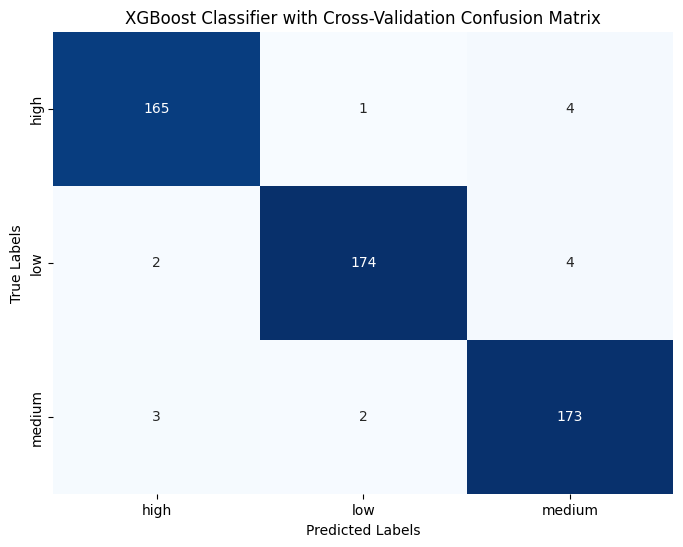

In [ ]:
#basic xgboost classifier
y_enc = y_resampled.apply(lambda x: 0 if x=='low' else (1 if x=='medium' else 2)) # need t
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc, test_size=0.33, random_state=42)

xgb_classifier_cv = XGBClassifier(
    objective='multi:softmax',  # Multiclass classification
    num_class=3,  # Number of classes in the target variable
    eval_metric='mlogloss',  # Evaluation metric for classification tasks
    n_estimators=100,  # Number of boosting rounds
    random_state=42
)

xgb_pred_cv = cross_val_predict(xgb_classifier_cv, X_train, y_train, cv=5)
class_labels = ['high', 'low', 'medium']
print("XGBoost Classifier with Cross-Validation Report:")
print(classification_report(y_train, xgb_pred_cv, zero_division=1))

y_train = y_train.apply(lambda x: 'low' if x==0 else ('medium' if x==1 else ('high' if x==2 else np.NaN)))
xgb_pred_cv_df = pd.DataFrame(xgb_pred_cv)
xgb_pred_cv_df = xgb_pred_cv_df.applymap(lambda x: 'low' if x==0 else ('medium' if x==1 else ('high' if x==2 else np.NaN)))
xgb_pred_cv = xgb_pred_cv_df.values

# Visualize the confusion matrix
confusionMatrix_xgb_cv = confusion_matrix(y_train, xgb_pred_cv, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix_xgb_cv, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('XGBoost Classifier with Cross-Validation Confusion Matrix')
plt.show()

#EDA

Take note, this is the original df, not the one adjusted to balance the target estimated php cost

In [ ]:
URL = 'https://raw.githubusercontent.com/Vz-3/dataset_storage/master/modeling%20and%20simulation/Formatted-Firesight-Dataset.csv'
ogDf = pd.read_csv(URL)

from ydata_profiling import ProfileReport
profile = ProfileReport(ogDf, title='Original Unimputed dataset.')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Testing relationships using classification (target = ALARM LEVEL, predictor, the rest except day and hour)
X = ogDf.drop(['ALARM_LEVEL','DAY','HOUR'],axis=1)
y = ogDf['ALARM_LEVEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

logR = LogisticRegression()
logR.fit(X_train, y_train)

logRpred = logR.predict(X_test)

print("CL Report: ",classification_report(y_test, logRpred, zero_division=1))

CL Report:                        precision    recall  f1-score   support

           1st alarm       1.00      0.40      0.57         5
           2nd alarm       1.00      1.00      1.00         1
fireout upon arrival       1.00      0.00      0.00        14
             missing       0.79      1.00      0.88        72
            no alarm       1.00      0.00      0.00         2

            accuracy                           0.80        94
           macro avg       0.96      0.48      0.49        94
        weighted avg       0.84      0.80      0.72        94



In [ ]:
#CELL A
#Testing relationships using classification (target = ALARM LEVEL, predictor: humidity, temperature)
X = ogDf[['HUMIDITY','TEMPERATURE']]
y = ogDf['ALARM_LEVEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

logR = LogisticRegression()
logR.fit(X_train, y_train)

logRpred = logR.predict(X_test)

print("CL Report: ",classification_report(y_test, logRpred, zero_division=1))

CL Report:                        precision    recall  f1-score   support

           1st alarm       1.00      0.00      0.00         8
           2nd alarm       1.00      0.00      0.00         1
fireout upon arrival       1.00      0.00      0.00        14
             missing       0.73      1.00      0.85        69
            no alarm       1.00      0.00      0.00         2

            accuracy                           0.73        94
           macro avg       0.95      0.20      0.17        94
        weighted avg       0.80      0.73      0.62        94



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


This is the crux of our paper or the modeling section

In [ ]:
#CELL B compare with CELL D
#Testing relationships using classification (target = ALARM LEVEL, predictor: humidity, temperature, fire_origins)
X = ogDf[['HUMIDITY','TEMPERATURE','FIRE_ORIGIN_battery short circuit', 'FIRE_ORIGIN_electrical ignition',
       'FIRE_ORIGIN_ignition of materials', 'FIRE_ORIGIN_lighted cigarette',
       'FIRE_ORIGIN_open flame', 'FIRE_ORIGIN_others',
       'FIRE_ORIGIN_overheated engine']]
y = ogDf['ALARM_LEVEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

logR = LogisticRegression()
logR.fit(X_train, y_train)

logRpred = logR.predict(X_test)

print("CL Report: ",classification_report(y_test, logRpred, zero_division=1))

CL Report:                        precision    recall  f1-score   support

           1st alarm       1.00      0.00      0.00         7
           2nd alarm       1.00      0.00      0.00         1
fireout upon arrival       1.00      0.00      0.00        14
             missing       0.76      1.00      0.86        71
            no alarm       1.00      0.00      0.00         1

            accuracy                           0.76        94
           macro avg       0.95      0.20      0.17        94
        weighted avg       0.82      0.76      0.65        94



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Now let's repeat them all again but with the imputed dataset.

In [ ]:
nDf = knn_idf.copy()

profile = ProfileReport(nDf, title='Original Unimputed dataset.')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#CELL C - compare this with A, minimal changes.
nX = nDf[['HUMIDITY','TEMPERATURE']]
nY = nDf['ALARM_LEVEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

logR = LogisticRegression()
logR.fit(X_train, y_train)

logRpred = logR.predict(X_test)

print("CL Report: ",classification_report(y_test, logRpred, zero_division=1))

CL Report:                        precision    recall  f1-score   support

           1st alarm       1.00      0.00      0.00         3
           2nd alarm       1.00      0.00      0.00         1
fireout upon arrival       0.00      0.00      0.00         9
             missing       0.84      0.97      0.90        79
            no alarm       1.00      0.00      0.00         2

            accuracy                           0.82        94
           macro avg       0.77      0.19      0.18        94
        weighted avg       0.77      0.82      0.76        94



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#CELL D
X = nDf[['HUMIDITY','TEMPERATURE','FIRE_ORIGIN_battery short circuit', 'FIRE_ORIGIN_electrical ignition',
       'FIRE_ORIGIN_ignition of materials', 'FIRE_ORIGIN_lighted cigarette',
       'FIRE_ORIGIN_open flame', 'FIRE_ORIGIN_others',
       'FIRE_ORIGIN_overheated engine']]
y = nDf['ALARM_LEVEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

logR = LogisticRegression()
logR.fit(X_train, y_train)

logRpred = logR.predict(X_test)

print("CL Report: ",classification_report(y_test, logRpred, zero_division=1))

CL Report:                        precision    recall  f1-score   support

           1st alarm       1.00      0.00      0.00        16
           2nd alarm       0.00      0.00      0.00         8
fireout upon arrival       0.72      0.95      0.82        66
            no alarm       1.00      0.00      0.00         4

            accuracy                           0.67        94
           macro avg       0.68      0.24      0.20        94
        weighted avg       0.72      0.67      0.57        94



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
nDf.columns

Index(['DAY', 'HOUR', 'ALARM_LEVEL', 'TEMPERATURE', 'HUMIDITY', 'DISTRICT1',
       'ENTITIES_nonresidential', 'ENTITIES_nonstructural',
       'ENTITIES_residential', 'ENTITIES_structural', 'ENTITIES_transport',
       'FIRE_ORIGIN_battery short circuit', 'FIRE_ORIGIN_electrical ignition',
       'FIRE_ORIGIN_ignition of materials', 'FIRE_ORIGIN_lighted cigarette',
       'FIRE_ORIGIN_open flame', 'FIRE_ORIGIN_others',
       'FIRE_ORIGIN_overheated engine', 'ESTIMATED_PHP_LOSS'],
      dtype='object')